In [1]:
from data_processing import *

### @TODO: TRY TX-TX AS WELL

# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE = torch.device("cpu")
train_data, OUT_DIM = load_create_ellipticpp(timestep=(1,32))
train_data = train_data.to(DEVICE)
test_data, OUT_DIM = load_create_ellipticpp(timestep=(33,37))
test_data = test_data.to(DEVICE)
valid_data, OUT_DIM = load_create_ellipticpp(timestep=(38,42))
valid_data = test_data.to(DEVICE)
# loader = split_into_batches(data, num_batches=batch_size, num_hops=2, num_neighbours=100)
# num_features = next(iter(loader)).x.shape[-1]
# data

In [67]:
train_data

### degree of 1 and 0
# consider quartiles for cutoff to select sizes

Data(x=[808175, 55], y=[808175], edge_index=[2, 1628191])

In [97]:
def select_subset(data: Data, binary_masking: bool=True, label_to_choose: int=None):
    if binary_masking:
        mask = torch.where((data.y == 1) | (data.y == 0))[0]
    elif label_to_choose:
        mask = torch.where(data.y == label_to_choose)[0]
    else:
        raise ValueError
    
    node_index = data.edge_index[torch.isin(data.edge_index, mask)]
    edge_index = data.edge_index[:,node_index]
    node_map = {old_idx.item(): new_idx for new_idx, old_idx in enumerate(edge_index.unique())}
    edge_index[0] = torch.as_tensor([node_map[old_idx.item()] for old_idx in edge_index[0]])
    edge_index[1] = torch.as_tensor([node_map[old_idx.item()] for old_idx in edge_index[1]])

    return Data(x=data.x[node_index,:], y=data.y[node_index], edge_index=edge_index)

t_a = select_subset(train_data, binary_masking=True)

In [11]:
mask = torch.where((train_data.y == 1) | (train_data.y == 0))[0]
t = train_data.edge_index[torch.isin(train_data.edge_index, mask)]
t = train_data.edge_index[:,t]
node_map = {old_idx.item(): new_idx for new_idx, old_idx in enumerate(t.unique())}
t[0] = torch.as_tensor([node_map[old_idx.item()] for old_idx in t[0]])
t[1] = torch.as_tensor([node_map[old_idx.item()] for old_idx in t[1]])

In [9]:
t.shape

torch.Size([2, 853444])

In [12]:
from torch_geometric.utils import degree

out_degree = degree(t[0], t.max()+1) # outgoing degree
in_degree = degree(t[1], t.max()+1) # incoming degree
print(f"Outgoing degree: Mean={out_degree.mean():0.3f}; Median={out_degree.median():0.3f}")
print(f"Incoming degree: Mean={in_degree.mean():0.3f}; Median={in_degree.median():0.3f}")
print("------")

out_degree = degree(test_data.edge_index[0], test_data.num_nodes) # outgoing degree
in_degree = degree(test_data.edge_index[1], test_data.num_nodes) # incoming degree
print(f"Outgoing degree: Mean={out_degree.mean():0.3f}; Median={out_degree.median():0.3f}")
print(f"Incoming degree: Mean={in_degree.mean():0.3f}; Median={in_degree.median():0.3f}")
print("------")

out_degree = degree(valid_data.edge_index[0], valid_data.num_nodes) # outgoing degree
in_degree = degree(valid_data.edge_index[1], valid_data.num_nodes) # incoming degree
print(f"Outgoing degree: Mean={out_degree.mean():0.3f}; Median={out_degree.median():0.3f}")
print(f"Incoming degree: Mean={in_degree.mean():0.3f}; Median={in_degree.median():0.3f}")

Outgoing degree: Mean=10.668; Median=0.000
Incoming degree: Mean=10.668; Median=2.000
------
Outgoing degree: Mean=2.934; Median=0.000
Incoming degree: Mean=2.934; Median=1.000
------
Outgoing degree: Mean=2.934; Median=0.000
Incoming degree: Mean=2.934; Median=1.000


<Axes: ylabel='Count'>

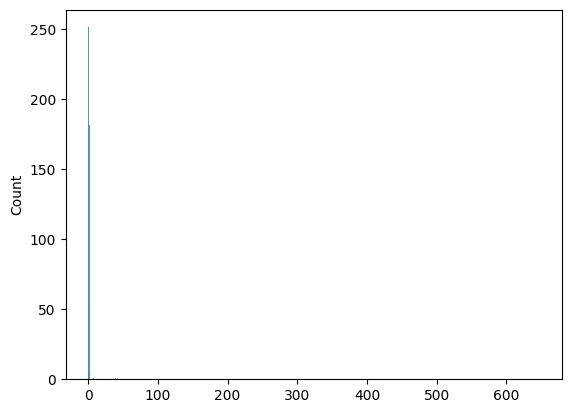

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.histplot(x=)